## Introduction :
- Yelp is a which publish crowd-sourced reviews about local businesses, as well as the online reservation service Yelp Reservations. The company also trains small businesses in how to respond to reviews, hosts social events for reviewers, and provides data about businesses, including health inspection scores.

- Yelp was founded in 2004 by former PayPal employees. By 2010 it had $30 million in revenues and the website had published more than 4.5 million crowd-sourced reviews.

**Attribues of review table are as following :**

    review_id: ID of the review
    user_id: ID of the user
    business_id: ID of the business
    stars: ratings of the business
    date: review date
    text: review from the user
    useful: number of users who vote a review as usefull
    funny: number of users who vote a review as funny
    cool: number of users who vote a review as cool

### Import Libraries

In [1]:
import json  
import pandas as pd  
from pandas.io.json import json_normalize  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import csv
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
pd.set_option('display.float_format', lambda x: '%.4f' % x)

### Import Dataset

In [2]:
reviews = pd.read_csv('yelp_review.csv')

In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261668 entries, 0 to 5261667
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   review_id    object
 1   user_id      object
 2   business_id  object
 3   stars        int64 
 4   date         object
 5   text         object
 6   useful       int64 
 7   funny        int64 
 8   cool         int64 
dtypes: int64(4), object(5)
memory usage: 361.3+ MB


In [4]:
reviews.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
date           0
text           0
useful         0
funny          0
cool           0
dtype: int64

In [5]:
reviews.head(3)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0


In [6]:
reviews.describe()

,stars,useful,funny,cool
count,5261668.0000,5261668.0000,5261668.0000,5261668.0000
mean,3.7277,1.3851,0.5092,0.5861
std,1.4336,4.5287,2.6862,2.2337
min,1.0000,-1.0000,0.0000,-1.0000
25%,3.0000,0.0000,0.0000,0.0000
50%,4.0000,0.0000,0.0000,0.0000
75%,5.0000,2.0000,0.0000,1.0000
max,5.0000,3364.0000,1481.0000,1105.0000


In [8]:
reviews["text"][17]

'Came here with my girlfriends one Sunday afternoon. This place will take a long time to serve your food - as it took them almost an hour to give us our food. So make sure you give yourself lots of time! It is definitely a lazy brunch place!\n\nDefinitely recommend the pancakes! Beware of the portion sizes - they are huge!'

### Dataset Visualization

In [9]:
reviews['length'] = reviews['text'].apply(len)

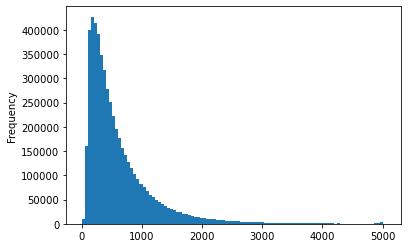

In [13]:
reviews['length'].plot(bins=100,kind = "hist");

In [14]:
reviews['length'].describe()

count   5261668.0000
mean        611.8673
std         572.1642
min           1.0000
25%         242.0000
50%         434.0000
75%         780.0000
max        5056.0000
Name: length, dtype: float64

In [ ]:
## The max review

In [15]:
reviews[reviews['length'] == 5056]['text'].iloc[0]

'On the day of execution, on the day of execution\n"Only women kneel and smile, ah-ah, ah-ah"\n\n-----------------------------------------\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad-------------------\n\nIn A Sentence™\nAll shiny and slick with a badass parking garage; however, it\'s a slimy shitshow .\n\nQuick Review™\n+   Artwork all around. Relatively vertical parking garage with sensor lights to notify of empty carports. Centrally located and accessible from the west via a bridge to avoid the boulevard.  \n\n+\\/- Venues: Book\\/Stage (defunct), Bond, Boulevard Pool, Chandelier, Chelsea, Rose.Rabbit.Lie.\n\n-    Where to start? It\'s a fucking shitshow: bunch of nickel and diming amateurs. \n\nEmployee of Excellence™ \nUnknown names: they used to work at Book\\/Stage and probably all got fired.\n\n-----------------------------------------\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad-------------------\n\nI have some personal experiences here.

In [ ]:
## The min review

In [16]:
reviews[reviews['length'] == 1]['text'].iloc[0]

'O'

In [ ]:
## The mean review

In [17]:
reviews[reviews['length'] == 611]['text'].iloc[0]

"Kantapia is great for what it is - a quick eats restaurant in a student area. \n\nThe seating isn't spectacular, the ambience is bare but there is a lively buzz to the restaurant that is endearing. \n\nThe staff are friendly and give advice on what to order and take the time to explain the more complicated menu items. The food is okay - the portions are generous. \n\nThey have specifically marked vegetarian items on the menu which is a really great point and are sweet to warn that the broth for their ramen is chicken based. \n\nGo on a cold day when you're close by and are looking for a good meal to warm you up."

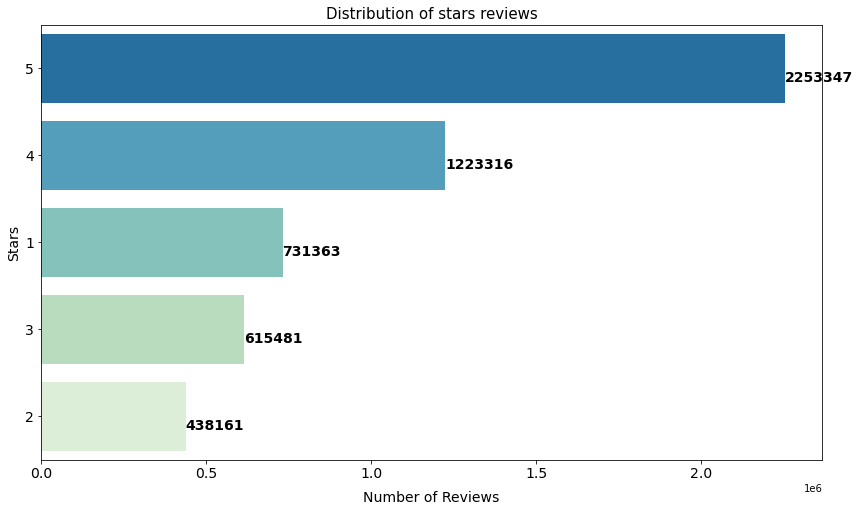

In [21]:
plt.figure(figsize=(14,8))
ind_reviews = reviews.stars.value_counts()
sns.countplot(y='stars',data=reviews, 
              order = ind_reviews.index, palette= sns.color_palette("GnBu_r", len(ind_reviews)))
plt.title('Distribution of stars reviews', fontsize=15)
plt.xlabel('Number of Reviews', fontsize=14, labelpad=10)
plt.ylabel('Stars', fontsize=14)
plt.tick_params(labelsize=14)
for  m, n in enumerate(reviews.stars.value_counts()):
    plt.text(n, m+0.15, str(n), fontweight='bold', fontsize=14)

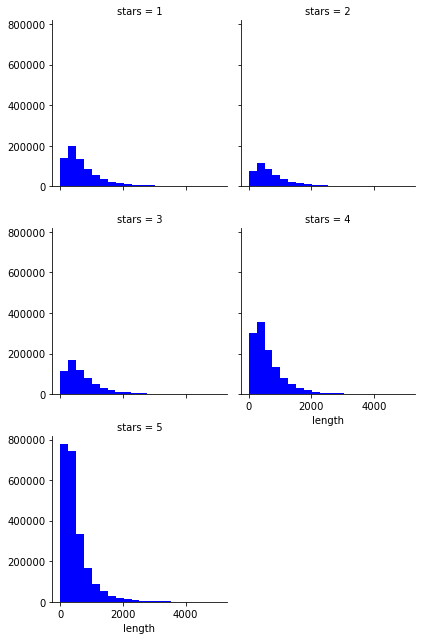

In [25]:
## Show the 5 stars column each one in seperate graph
vis_5s = sns.FacetGrid(data=reviews ,col="stars",col_wrap= 2)
vis_5s.map(plt.hist,"length",bins = 20,color = "b")